# Introduction

In this notebook I explore data from 2019 Los Angeles Homeless Count that can be found [here](https://geohub.lacity.org/datasets/lahub::homeless-count-los-angeles-county-2019/about). The data in this file was gathered by LAHSA but the file itself is from The City of Los Angeles Geohub. Unfortunately, this is the most recent downloadable data on the Los Angeles Homeless Count. The data files for the 2020 count have not been released to the public for download. Using this data I would like to explore the concentration of homeless individuals throughout the county. 

## Data Import

**Step 1:** First I will import a new geopandas module so that this notebook will be prepped to import and read my shapefile data.

In [44]:
import geopandas as gpd

This notebook is now ready to import data 

**Step 2:** Next, I import my zipped shapefile folder which is named *Homeless_Count_Los_Angeles_County_2019.zip*.

In [54]:
homeless_count = gpd.read_file('data/Homeless_Count_Los_Angeles_County_2019.zip')

## Data Exploration

**Step 3:** Now that my data is imported, I will check to see how many columns and rows are in my dataset.

In [56]:
homeless_count.shape

(2163, 19)

This result tells me that I have 2163 columns and 19 rows

**Step 4:** I check for the data type.

In [61]:
type(homeless_count)

geopandas.geodataframe.GeoDataFrame

I can now see that my data type is geopandas.geodataframe.GeoDataFrame


**Step 5:** I will now run a head code to check to see what my data table looks like.

In [63]:
homeless_count.head()

,FID,Tract_N,SPA,Detailed_1,CD,Detailed_N,SD,Tract_1,Year_1,totUnshe_1,totShelt_1,totPeopl_1,u_dens,s_dens,t_dens,unincorpor,SHAPE_Leng,SHAPE_Area,geometry
0,1,101110,2.0,Sunland-Tujunga NC,7.0,Sunland-Tujunga NC,5.0,101110.0,2019.0,12.614,0.0,12.614,28.600087,0.0,28.600087,No,0.047172,0.000112,"POLYGON ((-118.28491 34.25948, -118.28494 34.2..."
1,2,101122,2.0,Sunland-Tujunga NC,7.0,Sunland-Tujunga NC,5.0,101122.0,2019.0,1.000,0.0,1.000,0.979639,0.0,0.979639,No,0.096234,0.000259,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101210,2.0,Sunland-Tujunga NC,7.0,Sunland-Tujunga NC,5.0,101210.0,2019.0,14.517,0.0,14.517,57.787763,0.0,57.787763,No,0.037363,0.000064,"POLYGON ((-118.28594 34.24896, -118.28594 34.2..."
3,4,101220,2.0,Sunland-Tujunga NC,7.0,Sunland-Tujunga NC,5.0,101220.0,2019.0,24.058,0.0,24.058,89.152876,0.0,89.152876,No,0.038497,0.000068,"POLYGON ((-118.28100 34.25592, -118.28101 34.2..."
4,5,101300,2.0,Sunland-Tujunga NC,7.0,Sunland-Tujunga NC,5.0,101300.0,2019.0,9.278,0.0,9.278,9.313195,0.0,9.313195,No,0.085808,0.000253,"POLYGON ((-118.26530 34.25735, -118.26542 34.2..."


This shows me the first 5 rows of data so that I can have a better idea what information I'm working with. I see that I am given different geolocation categories that I can analyze. Not only am I given the latitude and longitude of each count location, I am also given the neighborhood, council districts, and census tracts.

**Step 6:** Next, I will plot the data too see what it looks like

<AxesSubplot:>

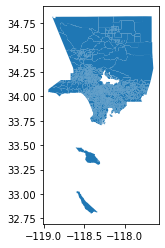

In [65]:
homeless_count.plot()

This plot uses the latitude and longitude location of each count to plot it's points. These points are overlayed over a map of LA County.

**Step 7:** Now I want to run a value count. However, I must first decide on a column I would like to count. 

In [66]:
homeless_count.columns.to_list()

['FID',
 'Tract_N',
 'SPA',
 'Detailed_1',
 'CD',
 'Detailed_N',
 'SD',
 'Tract_1',
 'Year_1',
 'totUnshe_1',
 'totShelt_1',
 'totPeopl_1',
 'u_dens',
 's_dens',
 't_dens',
 'unincorpor',
 'SHAPE_Leng',
 'SHAPE_Area',
 'geometry']

Now I see the name of each column so that I can decide which column I would like to run a value count on.

**Step 8:** First, I want to see what city council district has the highest count, so I run a value count on 'CD'.

In [76]:
homeless_count['CD'].value_counts()

0.0     1159
13.0      73
11.0      72
10.0      71
14.0      70
1.0       70
4.0       69
5.0       69
2.0       68
12.0      68
6.0       66
15.0      66
7.0       65
9.0       62
3.0       60
8.0       55
Name: CD, dtype: int64

This value count shows me the 5 council districts with the highest concentration and the 5 with the lowest concentration of homeless individuals. As you can see, District 13 has the highest concentration and District 8 has the lowest.

**Step 9:** Now, I want to check which neighborhood has the highest concentration, so I run a value count on 'Detailed_1'.

In [77]:
homeless_count['Detailed_1'].value_counts()

Santa Clarita                       44
Torrance                            31
Pomona                              30
Palmdale                            29
Lancaster                           29
                                    ..
Unincorporated Long Beach Island     1
Marina Del Rey                       1
Ladera Heights                       1
Calabasas                            1
Vincent                              1
Name: Detailed_1, Length: 248, dtype: int64

This value count shows me the 5 neighborhoods with the highest concentration and the 5 neighborhoods with the lowest concentration of homeless individuals. As you can see, Santa Clarita has the highest concentration at 44 individuals counted, and the 5 neighborhoods with the lowest only have a count of 1. 

**Step 10:** Since Council District 13 had the highest concentration, I want to run a query to filter my data so that I can take a better look at the data of the counts within CD 13.

In [83]:
homeless_count[homeless_count.CD == 13.0]

,FID,Tract_N,SPA,Detailed_1,CD,Detailed_N,SD,Tract_1,Year_1,totUnshe_1,totShelt_1,totPeopl_1,u_dens,s_dens,t_dens,unincorpor,SHAPE_Leng,SHAPE_Area,geometry
385,386,186301,4.0,Glassell Park NC,13.0,Glassell Park NC,1.0,186301.0,2019.0,2.758,0.0,2.758,6.147177,0.0,6.147177,No,0.056093,0.000114,"POLYGON ((-118.23607 34.12446, -118.23591 34.1..."
387,388,186401,4.0,Glassell Park NC,13.0,Glassell Park NC,1.0,186401.0,2019.0,44.432,0.0,44.432,119.750934,0.0,119.750934,No,0.054983,0.000094,"POLYGON ((-118.24866 34.12065, -118.24678 34.1..."
390,391,187101,4.0,Atwater Village NC,13.0,Atwater Village NC,1.0,187101.0,2019.0,14.812,0.0,14.812,48.679692,0.0,48.679692,No,0.038380,0.000077,"POLYGON ((-118.25428 34.11878, -118.25427 34.1..."
391,392,187102,4.0,Atwater Village NC,13.0,Atwater Village NC,1.0,187102.0,2019.0,29.300,0.0,29.300,34.534537,0.0,34.534537,No,0.114300,0.000215,"POLYGON ((-118.24745 34.11307, -118.24699 34.1..."
392,393,187200,4.0,Elysian Valley Riverside NC,13.0,Elysian Valley Riverside NC,1.0,187200.0,2019.0,58.686,0.0,58.686,159.684742,0.0,159.684742,No,0.047252,0.000093,"POLYGON ((-118.24816 34.10827, -118.24710 34.1..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,211122,4.0,Rampart Village NC,13.0,Rampart Village NC,2.0,211122.0,2019.0,123.470,0.0,123.470,874.812587,0.0,874.812587,No,0.024372,0.000036,"POLYGON ((-118.29051 34.07633, -118.28945 34.0..."
580,581,211201,4.0,Wilshire Center-Koreatown NC,13.0,Wilshire Center-Koreatown NC,2.0,211201.0,2019.0,1.427,0.0,1.427,26.519500,0.0,26.519500,No,0.014800,0.000014,"POLYGON ((-118.29657 34.07631, -118.29655 34.0..."
581,582,211202,4.0,Wilshire Center-Koreatown NC,13.0,Wilshire Center-Koreatown NC,2.0,211202.0,2019.0,11.762,0.0,11.762,170.030750,0.0,170.030750,No,0.016913,0.000017,"POLYGON ((-118.29170 34.07633, -118.29169 34.0..."
582,583,211310,4.0,Wilshire Center-Koreatown NC,13.0,Wilshire Center-Koreatown NC,2.0,211310.0,2019.0,6.830,0.0,6.830,122.890826,0.0,122.890826,No,0.015005,0.000014,"POLYGON ((-118.29795 34.06903, -118.29913 34.0..."


Now I am only shown the 73 counts in CD 13, and I can take a closer look at how the data in that council dristrict is further broken down. For example, even though all the counts in this table have the same council district, they can have a different neighborhood and census tract.

**Step 11:** Next, I want to make a bar plot of the value counts within each neighborhood. First, I must save the category as a variable. 

In [85]:
line_count = homeless_count['Detailed_1'].value_counts()
line_count

Santa Clarita                       44
Torrance                            31
Pomona                              30
Palmdale                            29
Lancaster                           29
                                    ..
Unincorporated Long Beach Island     1
Marina Del Rey                       1
Ladera Heights                       1
Calabasas                            1
Vincent                              1
Name: Detailed_1, Length: 248, dtype: int64

I have defined the variable "line_count" as the value count of the Neighborhood Column, and now we see that count listed again with the 5 neighborhoods with the highest and lowest counts listed.

**Step 12:** Now I will code a bar plot that can help us visualize the value count within each neighborhood.

<AxesSubplot:title={'center':'Number of counts per neighborhood'}>

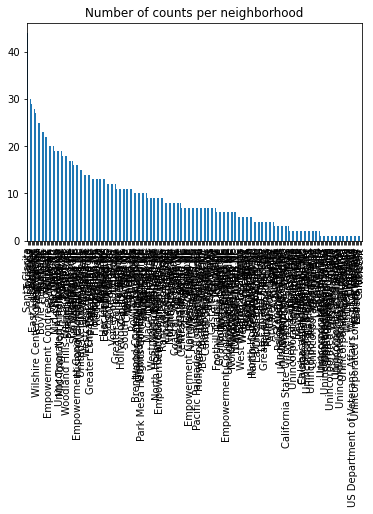

In [86]:
line_count.plot.bar(x = 'neighborhood', y = 'count', title = 'Number of counts per neighborhood')

This bar plot visualizes the distribution of the homeless count throughout the different neighborhoods. 